In [1]:
import json
from functools import reduce
from statistics import mean

Load data

In [2]:
with open('repoToSteps.json') as repoToSteps:
    repoToStepsCWL = {
        repo: list(filter(lambda step: '.cwl' in step, steps))
        for repo, steps in json.loads(repoToSteps.read()).items()
    }

In [3]:
with open('phenotypeGroups.json') as phenotypeGroups:
    phenotypeGroups = json.loads(phenotypeGroups.read())

In [4]:
with open('intersections.json') as intersections:
    intersections = json.loads(intersections.read())

Condition group statistics

In [5]:
print('\nTotal definitions: ' + str(len(repoToStepsCWL.keys())))


Total definitions: 1171


In [6]:
conditionGroups = phenotypeGroups.keys()
print('\nCondition groups: ' + str(len(conditionGroups)))


Condition groups: 178


In [7]:
groupedConditions = list(phenotypeGroups.keys()) + [
    json.dumps(item) for sublist in phenotypeGroups.values() for item in sublist
]
print('\nGrouped conditions: ' + str(len(groupedConditions)))


Grouped conditions: 687


In [8]:
ungroupedConditions = [
    repo for repo in repoToStepsCWL.keys() if repo not in groupedConditions
]
print(
    '\nUngrouped conditions: '
    + str(
        sorted(
            list(
                set(
                    [
                        json.loads(condition)['"name"'].split('---')[0]
                        for condition in ungroupedConditions
                    ]
                )
            )
        )
    )
)


Ungrouped conditions: ['Abdominal-Hernia', 'Abdominal-Pain', 'Acei-Loop-diuretic', 'Acne', 'Actinic-keratosis', 'Acute-Myocardial-Infarction', 'Acute-Nasopharyngitis-Primary-care', 'Acute-Nasopharyngitis-Secondary-care', 'Acute-bronchitis-Biobank', 'Acute-bronchitis-Primary-care', 'Acute-bronchitis-Secondary-care', 'Acute-cutaneous-lupus', 'Affective-Psychotic-Disorders', 'Agranulocytosis', 'Allergic-and-chronic-rhinitis', 'Amiodarone', 'Anal-fissure', 'Anaphylaxis', 'Angiodysplasia-of-colon', 'Angiotensin-Iireceptorantagonists', 'Anorectal-fistula', 'Anorectal-prolapse', 'Anorexia-and-bulimia-nervosa', 'Anterior-and-Intermediate-Uveitis', 'Anti-Diabetics', 'Anticoagulants', 'Antidepressant', 'Antidiabetic-Medications', 'Antiepileptic', 'Antihypertensive-Drugs', 'Antiphospholipid', 'Antiplatelet-Agents', 'Antiplatelets', 'Anxiety--Phenotype', 'Anxiety--Primary-Care', 'Anxiety-Disorder', 'Anxiety-Disorders', 'Anxiety-and-Neurotic-Disorders', 'Anxiety-disorders', 'Anxiolytic-Hypnotic', 

In [9]:
print('\nCount of ungrouped conditions: ' + str(len(ungroupedConditions)))


Count of ungrouped conditions: 562


In [10]:
print('\nUnique conditions: ' + str(len(conditionGroups) + len(ungroupedConditions)))


Unique conditions: 740


In [11]:
print(
    '\nProportion of conditions grouped: '
    + str(round(len(groupedConditions) / len(repoToStepsCWL.keys()) * 100, 2))
    + '%'
)


Proportion of conditions grouped: 58.67%


In [12]:
print(
    '\nDefinitions per condition: '
    + str(
        len(repoToStepsCWL.keys()) / (len(conditionGroups) + len(ungroupedConditions))
    )
)


Definitions per condition: 1.5824324324324324


Largest condition group analysis

In [13]:
sortedConditionGroups = sorted(
    [
        (leadCondition, len(otherConditions) + 1)
        for leadCondition, otherConditions in phenotypeGroups.items()
    ],
    key=lambda conditionGroupEntry: conditionGroupEntry[1],
    reverse=True,
)
largestConditionGroup = sortedConditionGroups[0]
print('\nLargest condition group: ' + str(largestConditionGroup))


Largest condition group: ('{"\\"name\\"": "Diabetes---d88be170-16f1-11ef-9de4-4d4ea830ad16", "\\"about\\"": "Diabetes - PH8"}', 30)


In [14]:
print(phenotypeGroups[largestConditionGroup[0]])

[{'"name"': 'Diabetes---4ce31400-16fa-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH24'}, {'"name"': 'Diabetes---a1f20850-1779-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH152'}, {'"name"': 'Diabetes---87522990-184a-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH375'}, {'"name"': 'Diabetes---c10cdf70-19eb-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH518'}, {'"name"': 'Diabetes---f3206ee0-19ec-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH519'}, {'"name"': 'Diabetes---b8c00ec0-19ee-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH520'}, {'"name"': 'Diabetes---e53eb430-1a37-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH580'}, {'"name"': 'Diabetes---1d8a7370-1aaa-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH618'}, {'"name"': 'Diabetes---cd970470-1ad4-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH629'}, {'"name"': 'Diabetes---96e3b550-1d1c-11ef-94c0-09c4aef33dd3', '"about"': 'Diabetes - PH832'}, {'"name"': 'Diabetes---5845e8e0-1d3a-11ef-94c0-09c4aef33dd3'

In [15]:
MIN_COMMON_STEPS_FOR_INTERSECTION = 0


def getIntersectingConditions(conditionGroup):
    return set(
        map(
            lambda repo: repo['"name"'],
            reduce(
                lambda allConditionsWithIntersection, conditionsWithIntersection: allConditionsWithIntersection
                + json.loads(conditionsWithIntersection),
                list(
                    dict(
                        filter(
                            lambda conditionPairAndIntersectingSteps: len(
                                conditionPairAndIntersectingSteps[1]
                            )
                            > MIN_COMMON_STEPS_FOR_INTERSECTION,
                            intersections[conditionGroup[0]].items(),
                        )
                    ).keys()
                ),
                [],
            ),
        )
    )

In [16]:
intersectingConditions = getIntersectingConditions(largestConditionGroup)
print(
    '\nIntersecting conditions in largest condition group: '
    + str(intersectingConditions)
)


Intersecting conditions in largest condition group: {'Diabetes---d88be170-16f1-11ef-9de4-4d4ea830ad16', 'Metformin---6da8b740-1cd5-11ef-bdee-f10829e63eeb', 'Diabetes---c10cdf70-19eb-11ef-9de4-4d4ea830ad16', 'Diabetes---74eb7c70-1d4a-11ef-94c0-09c4aef33dd3', 'Sulfonylureas---0674d630-1c26-11ef-bdee-f10829e63eeb', 'Acarbose---a74b8e40-1bd7-11ef-bdee-f10829e63eeb', 'Diabetes---f3206ee0-19ec-11ef-9de4-4d4ea830ad16', 'Diabetes---b8c00ec0-19ee-11ef-9de4-4d4ea830ad16', 'Thiazolidinediones---b8c49280-1c26-11ef-bdee-f10829e63eeb', 'Diabetes---4ce31400-16fa-11ef-9de4-4d4ea830ad16', 'Diabetes-Medication---3541e3f0-1847-11ef-9de4-4d4ea830ad16', 'Diabetes-with-end-organ-damage-Charlson-primary-care---bc9f6350-1df5-11ef-94c0-09c4aef33dd3', 'Diabetes---a1f20850-1779-11ef-9de4-4d4ea830ad16', 'Diabetes-Comorbidities---f6eab580-1cda-11ef-bdee-f10829e63eeb', 'Diabetes---96e3b550-1d1c-11ef-94c0-09c4aef33dd3', 'Metformin---3d721d70-1a1c-11ef-9de4-4d4ea830ad16', 'Metformin---74b729a0-1cd4-11ef-bdee-f10829e

In [17]:
print(
    '\nNumber of intersection conditions in largest condition group: '
    + str(len(intersectingConditions))
)


Number of intersection conditions in largest condition group: 30


In [18]:
from util import filterFirstOccurrences


def getCommonStepsInGroup(conditionGroup):
    return list(
        map(
            lambda conditionsToCommonSteps: {
                'conditions': json.loads(conditionsToCommonSteps[0]),
                'commonSteps': len(filterFirstOccurrences(conditionsToCommonSteps[1])),
            },
            intersections[conditionGroup[0]].items(),
        )
    )


commonStepsInLargestGroup = getCommonStepsInGroup(largestConditionGroup)

Definition pair analysis in largest group

In [19]:
mostCommonStepsInLargestGroup = max(
    commonStepsInLargestGroup,
    key=lambda overlapNumbersEntry: overlapNumbersEntry['commonSteps'],
)

In [20]:
print(
    '\nDefinition pair with most common steps in largest condition group + number of common (+ number of steps (% of which common) in respective workflows): '
    + str(mostCommonStepsInLargestGroup)
    + ' -- '
    + str(
        len(repoToStepsCWL[json.dumps(mostCommonStepsInLargestGroup['conditions'][0])])
    )
    + ' ('
    + str(
        round(
            mostCommonStepsInLargestGroup['commonSteps']
            / len(
                repoToStepsCWL[
                    json.dumps(mostCommonStepsInLargestGroup['conditions'][0])
                ]
            )
            * 100,
            2,
        )
    )
    + '%) '
    + str(
        len(repoToStepsCWL[json.dumps(mostCommonStepsInLargestGroup['conditions'][1])])
    )
    + ' ('
    + str(
        round(
            mostCommonStepsInLargestGroup['commonSteps']
            / len(
                repoToStepsCWL[
                    json.dumps(mostCommonStepsInLargestGroup['conditions'][1])
                ]
            )
            * 100,
            2,
        )
    )
    + '%)'
)


Definition pair with most common steps in largest condition group + number of common (+ number of steps (% of which common) in respective workflows): {'conditions': [{'"name"': 'Diabetes-Charlson-primary-care---c4782000-1df3-11ef-94c0-09c4aef33dd3', '"about"': 'Diabetes (uncomplicated) Charlson primary care - PH1067'}, {'"name"': 'Diabetes-Elixhauser-primary-care---398956f0-1e00-11ef-94c0-09c4aef33dd3', '"about"': 'Diabetes (uncomplicated) Elixhauser primary care - PH1077'}], 'commonSteps': 73} -- 79 (92.41%) 81 (90.12%)


In [21]:
print('\nCommon steps between definition pair with most common steps in largest group:')
for line in intersections[largestConditionGroup[0]][
    json.dumps(mostCommonStepsInLargestGroup['conditions'])
]:
    print(line)


Common steps between definition pair with most common steps in largest group:
['diabetes-uncomplicated-charlson-primary-care-mellitus---primary.cwl', 'diabetes-uncomplicated-elixhauser-primary-care-mellitus---primary.cwl']
['diabetes-uncomplicated-charlson-primary-care-followup---primary.cwl', 'diabetes-uncomplicated-elixhauser-primary-care-followup---primary.cwl']
['nephropathy-diabetes-uncomplicated-charlson-primary-care---primary.cwl', 'nephropathy-diabetes-uncomplicated-elixhauser-primary-care---primary.cwl']
['diabetes-uncomplicated-charlson-primary-care-preconception---primary.cwl', 'diabetes-uncomplicated-elixhauser-primary-care-preconception---primary.cwl']
['clinical-diabetes-uncomplicated-charlson-primary-care---primary.cwl', 'clinical-diabetes-uncomplicated-elixhauser-primary-care---primary.cwl']
['digital-diabetes-uncomplicated-charlson-primary-care---primary.cwl', 'digital-diabetes-uncomplicated-elixhauser-primary-care---primary.cwl']
['annual-diabetes-uncomplicated-charl

In [22]:
leastCommonStepsInLargestGroup = min(
    commonStepsInLargestGroup,
    key=lambda overlapNumbersEntry: overlapNumbersEntry['commonSteps'],
)

In [23]:
print('\nLeast common steps in largest group: ' + str(leastCommonStepsInLargestGroup))


Least common steps in largest group: {'conditions': [{'"name"': 'Diabetes---d88be170-16f1-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH8'}, {'"name"': 'Diabetes---c10cdf70-19eb-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH518'}], 'commonSteps': 1}


In [24]:
def getAverageCommonStepsInGroup(commonStepsInGroup):
    return round(
        mean(list(map(lambda overlap: overlap['commonSteps'], commonStepsInGroup))),
        2,
    )


averageCommonStepsInLargestGroup = getAverageCommonStepsInGroup(
    commonStepsInLargestGroup
)

In [25]:
def getStepLengthsInGroup(conditionGroup):
    return [
        (
            len(repoToStepsCWL[largestGroupPhenotype])
            if isinstance(largestGroupPhenotype, str)
            else len(repoToStepsCWL[json.dumps(largestGroupPhenotype)])
        )
        for largestGroupPhenotype in (
            [conditionGroup[0]] + phenotypeGroups[conditionGroup[0]]
        )
    ]


stepLengthsInLargestGroup = getStepLengthsInGroup(largestConditionGroup)
print('\nStep lengths in largest group: ' + str(sorted(stepLengthsInLargestGroup)))


Step lengths in largest group: [1, 2, 3, 3, 8, 15, 20, 22, 25, 28, 28, 29, 30, 31, 32, 32, 37, 41, 41, 42, 45, 62, 68, 75, 79, 81, 86, 90, 95, 124]


In [26]:
print(
    '\nAverage common steps in largest group (+ average number of steps (% of which common)): '
    + str(int(averageCommonStepsInLargestGroup))
    + ' ('
    + str(int(mean(stepLengthsInLargestGroup)))
    + ' ('
    + str(
        round(
            int(averageCommonStepsInLargestGroup)
            / int(mean(stepLengthsInLargestGroup))
            * 100,
            2,
        )
    )
    + '%)'
    + ')'
)


Average common steps in largest group (+ average number of steps (% of which common)): 5 (42 (11.9%))


N largest condition groups analysis in graph form

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plotIntersectionInLargestGroups():

    frame = pd.DataFrame(
        [
            [
                str(' '.join(json.loads(key)['"name"'].split('---')[0].split('-'))),
                int(getAverageCommonStepsInGroup(getCommonStepsInGroup([key, value]))),
                int(mean(getStepLengthsInGroup([key, value])))
                - int(
                    getAverageCommonStepsInGroup(getCommonStepsInGroup([key, value]))
                ),
            ]
            for key, value in list(reversed(sortedConditionGroups[:10]))
        ],
        columns=['Condition group', 'Common', 'Distinct'],
    )
    frame.plot(x='Condition group', kind='barh', stacked=True, mark_right=True)
    frameTotal = frame['Common'] + frame['Distinct']
    frameProportions = frame[frame.columns[1:]].div(frameTotal, 0) * 100
    for column in frameProportions:
        for y, (sumWithPrecedingColumns, originalFrameValue, proportion) in enumerate(
            zip(
                frame.iloc[:, 1:].cumsum(1)[column],
                frame[column],
                frameProportions[column],
            )
        ):
            plt.text(
                sumWithPrecedingColumns - (originalFrameValue / 2),
                y,
                str(np.round(proportion, 1)) + '%',
                va='center',
                ha='center',
            )
    plt.xlabel('Average number of definition steps')

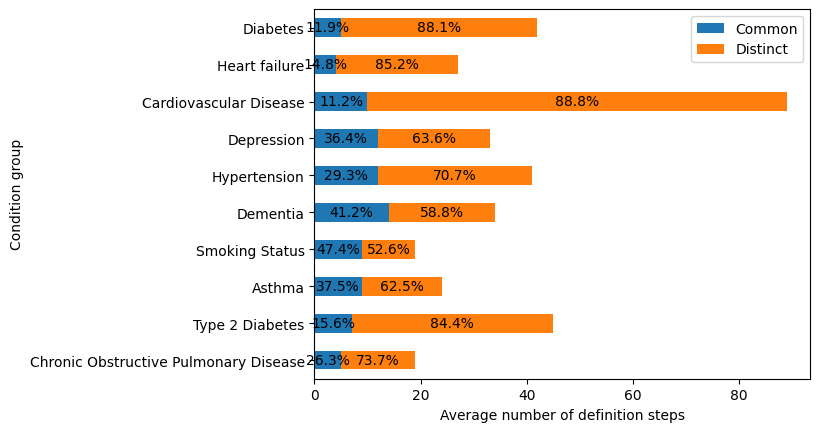

In [28]:
%matplotlib inline
plotIntersectionInLargestGroups()

In [29]:
import matplotlib

matplotlib.use("pgf")
plotIntersectionInLargestGroups()
plt.tight_layout()
plt.savefig('../charts/common-steps-in-largest-groups.pgf')